# Kidney Disease 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("kidney.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [4]:
df.drop(['id'], inplace=True, axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [6]:
df.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [7]:
df.classification.value_counts(normalize=True)

classification
ckd       0.620
notckd    0.375
ckd\t     0.005
Name: proportion, dtype: float64

c:\Users\Vinay\Documents\Physician.Ai\venv\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
c:\Users\Vinay\Documents\Physician.Ai\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


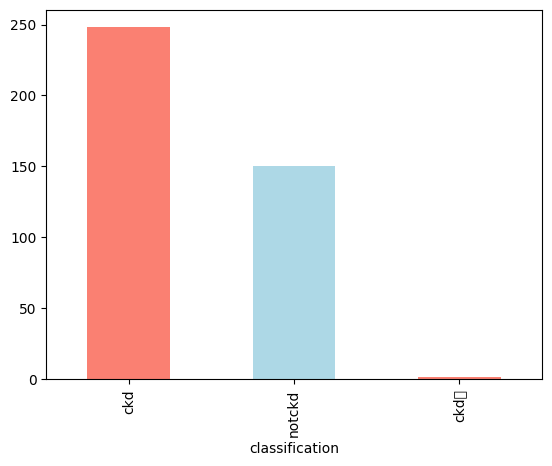

In [8]:
df.classification.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [9]:
for col in df.columns:
    print(f"'{col}': having type *{df[col].dtype}* has {df[col].unique()} unique values\n")

'age': having type *float64* has [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] unique values

'bp': having type *float64* has [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] unique values

'sg': having type *float64* has [1.02  1.01  1.005 1.015   nan 1.025] unique values

'al': having type *float64* has [ 1.  4.  2.  3.  0. nan  5.] unique values

'su': having type *float64* has [ 0.  3.  4.  1. nan  2.  5.] unique values

'rbc': having type *object* has [nan 'normal' 'abnormal'] unique values

'pc': having type *object* has ['normal' 'abnormal' nan] unique values

'pcc': having type *object* has ['notpresent' 'present' nan] unique values

'ba': having type *object* has ['notpresent' 'present' nan] unique values


In [10]:
df['pcv'] = pd.to_numeric(df['pcv'],errors="coerce")
df['wc'] = pd.to_numeric(df['wc'],errors="coerce")
df['rc'] = pd.to_numeric(df['rc'],errors="coerce")

In [11]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

In [12]:
num_cols

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

In [13]:
cat_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [14]:
for col in cat_cols:
    print(f"'{col}': having type *{df[col].dtype}* has {df[col].unique()} unique values\n")

'rbc': having type *object* has [nan 'normal' 'abnormal'] unique values

'pc': having type *object* has ['normal' 'abnormal' nan] unique values

'pcc': having type *object* has ['notpresent' 'present' nan] unique values

'ba': having type *object* has ['notpresent' 'present' nan] unique values

'htn': having type *object* has ['yes' 'no' nan] unique values

'dm': having type *object* has ['yes' 'no' ' yes' '\tno' '\tyes' nan] unique values

'cad': having type *object* has ['no' 'yes' '\tno' nan] unique values

'appet': having type *object* has ['good' 'poor' nan] unique values

'pe': having type *object* has ['no' 'yes' nan] unique values

'ane': having type *object* has ['no' 'yes' nan] unique values

'classification': having type *object* has ['ckd' 'ckd\t' 'notckd'] unique values



In [15]:
df['dm'].replace(to_replace={'\tno' :'no' ,'\tyes' :'yes' , ' yes' :'yes'},inplace=True)
df['cad'].replace(to_replace='\tno' , value='no',inplace=True)
df['classification'].replace(to_replace="ckd\t" ,value="ckd",inplace=True) 

In [16]:
for col in cat_cols:
    print(f"'{col}': having type *{df[col].dtype}* has {df[col].unique()} unique values\n")

'rbc': having type *object* has [nan 'normal' 'abnormal'] unique values

'pc': having type *object* has ['normal' 'abnormal' nan] unique values

'pcc': having type *object* has ['notpresent' 'present' nan] unique values

'ba': having type *object* has ['notpresent' 'present' nan] unique values

'htn': having type *object* has ['yes' 'no' nan] unique values

'dm': having type *object* has ['yes' 'no' nan] unique values

'cad': having type *object* has ['no' 'yes' nan] unique values

'appet': having type *object* has ['good' 'poor' nan] unique values

'pe': having type *object* has ['no' 'yes' nan] unique values

'ane': having type *object* has ['no' 'yes' nan] unique values

'classification': having type *object* has ['ckd' 'notckd'] unique values



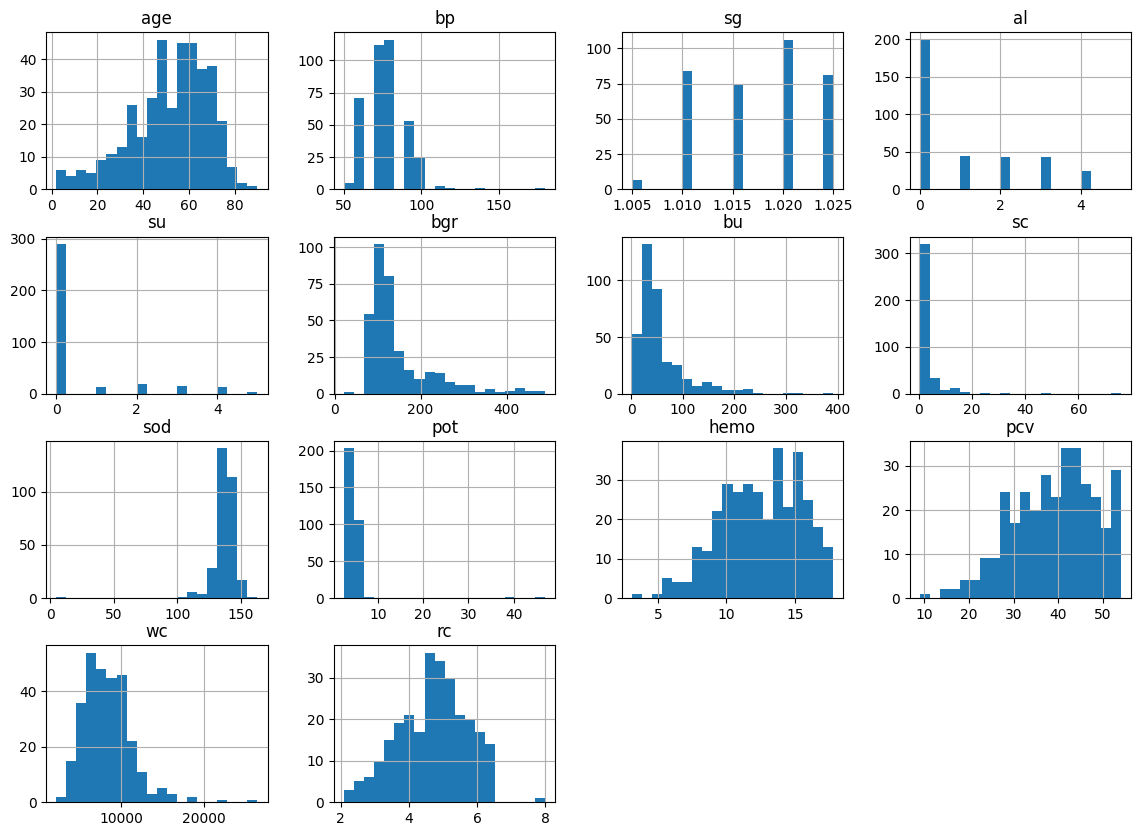

In [17]:
df.hist(figsize=(14,10), bins=20);

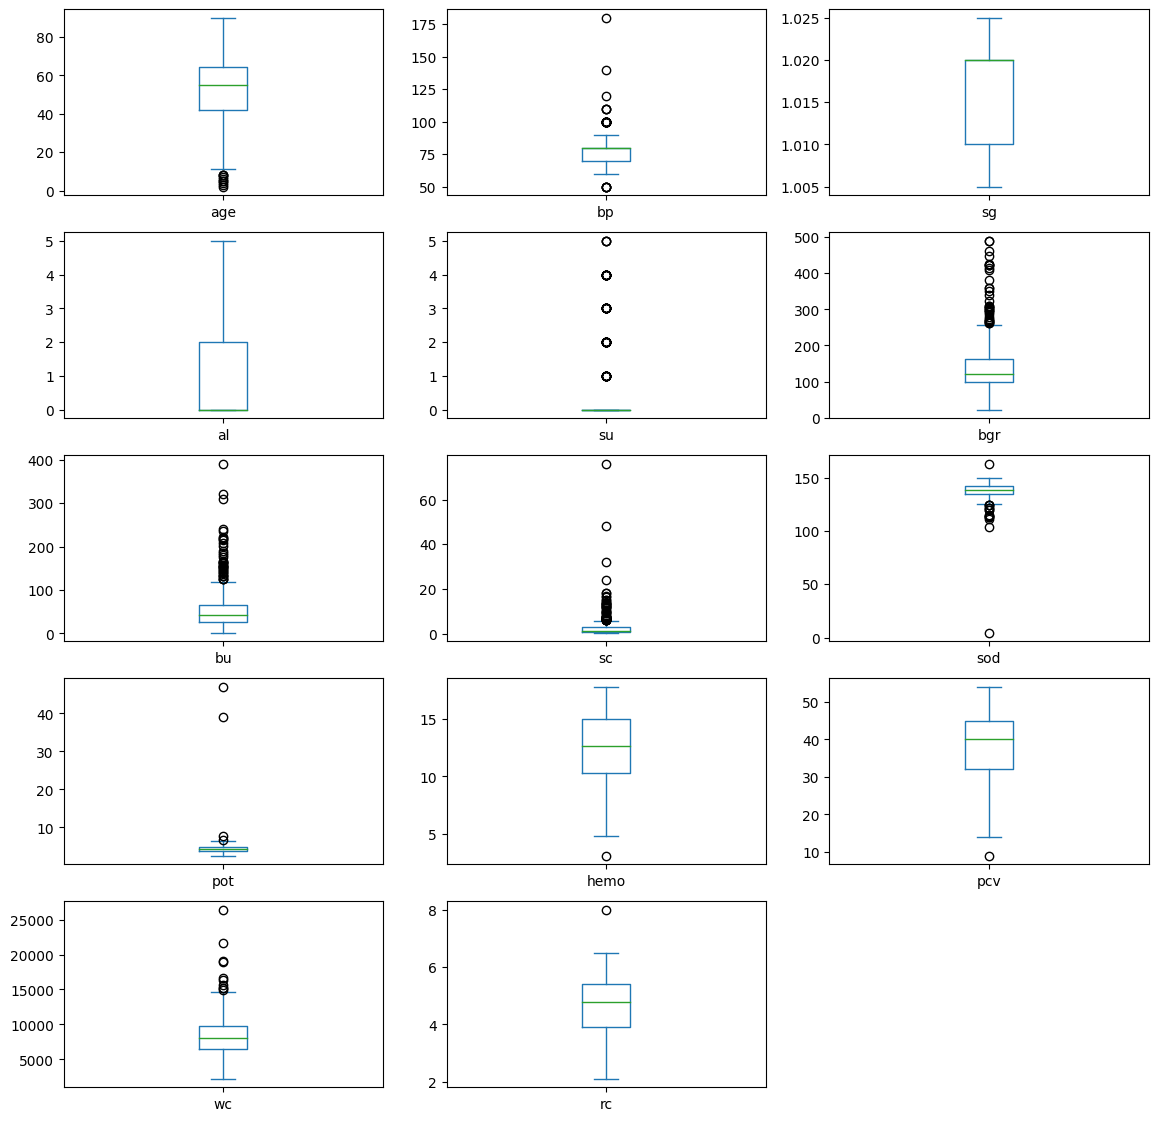

In [18]:
df.plot(kind='box', subplots=True, layout=(5,3), sharex=False,sharey=False ,figsize =(14,14));

In [19]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature] =random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] =df[feature].fillna(mode)

In [20]:
for col in num_cols:
    random_value_imputation(col)

In [21]:
df[num_cols].isnull().sum()

age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wc      0
rc      0
dtype: int64

In [22]:
for col in cat_cols:
    impute_mode(col)
    
df[cat_cols].isnull().sum()

rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [23]:
 from sklearn.preprocessing  import LabelEncoder

encode = LabelEncoder()

for col in cat_cols:
    df[col]=encode.fit_transform(df[col])

In [24]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,201.0,...,38.0,6000.0,4.4,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,3.8,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [25]:
for col in cat_cols:
    print(f'{col} {df[col].unique()}')

rbc [1 0]
pc [1 0]
pcc [0 1]
ba [0 1]
htn [1 0]
dm [1 0]
cad [0 1]
appet [0 1]
pe [0 1]
ane [0 1]
classification [0 1]


In [26]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

X = df.drop(['classification'], axis=1)
y = df['classification']

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [27]:
feature_sel_model.get_support()

array([ True,  True, False,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True, False])

In [28]:
# let's print the number of total and selected features

selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 24
selected features: 17


In [29]:
selected_feat

Index(['age', 'bp', 'al', 'su', 'rbc', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'rc', 'htn', 'dm', 'appet', 'pe'],
      dtype='object')

In [30]:
X_data = df[['age', 'bp', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'hemo', 'pcv', 'rc',
       'htn', 'dm', 'appet', 'pe', 'ane']]
y_data = df.classification

In [31]:
X_data.head()

,age,bp,al,su,bgr,bu,sc,sod,hemo,pcv,rc,htn,dm,appet,pe,ane
0,48.0,80.0,1.0,0.0,121.0,36.0,1.2,146.0,15.4,44.0,5.2,1,1,0,0,0
1,7.0,50.0,4.0,0.0,201.0,18.0,0.8,136.0,11.3,38.0,4.4,0,0,0,0,0
2,62.0,80.0,2.0,3.0,423.0,53.0,1.8,127.0,9.6,31.0,3.8,0,1,1,0,1
3,48.0,70.0,4.0,0.0,117.0,56.0,3.8,111.0,11.2,32.0,3.9,1,0,1,1,1
4,51.0,80.0,2.0,0.0,106.0,26.0,1.4,131.0,11.6,35.0,4.6,0,0,0,0,0


In [32]:
X_data.tail()

,age,bp,al,su,bgr,bu,sc,sod,hemo,pcv,rc,htn,dm,appet,pe,ane
395,55.0,80.0,0.0,0.0,140.0,49.0,0.5,150.0,15.7,47.0,4.9,0,0,0,0,0
396,42.0,70.0,0.0,0.0,75.0,31.0,1.2,141.0,16.5,54.0,6.2,0,0,0,0,0
397,12.0,80.0,0.0,0.0,100.0,26.0,0.6,137.0,15.8,49.0,5.4,0,0,0,0,0
398,17.0,60.0,0.0,0.0,114.0,50.0,1.0,135.0,14.2,51.0,5.9,0,0,0,0,0
399,58.0,80.0,0.0,0.0,131.0,18.0,1.1,141.0,15.8,53.0,6.1,0,0,0,0,0


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data)

In [34]:
X_train.shape, X_test.shape

((300, 16), (100, 16))

In [35]:
def model_with_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [36]:
models = {"RandomForest": RandomForestClassifier(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression()}

model_scores = model_with_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

c:\Users\Vinay\Documents\Physician.Ai\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForest': 0.96, 'KNN': 0.88, 'SVC': 0.89, 'LogisticRegression': 0.96}

In [37]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)

# Define a grid of hyperparameters
grid = {"n_estimators": [10, 100, 200, 500, 1000],
        "max_depth": [None, 5, 10, 20, 30],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

rs_RFC = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                param_distributions=grid,
                                n_iter=5,
                                verbose=True)

rs_RFC.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [38]:
rs_RFC.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_depth': 30}

In [39]:
model = RandomForestClassifier( n_estimators=200,
                               min_samples_split= 6,
                               min_samples_leaf= 2,
                                max_depth=30)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=6,
                       n_estimators=200)

### Checking the accuracy

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)
print(f'Accuracy-Score: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

Accuracy-Score: 0.95
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.94      0.92      0.93        37

    accuracy                           0.95       100
   macro avg       0.95      0.94      0.95       100
weighted avg       0.95      0.95      0.95       100



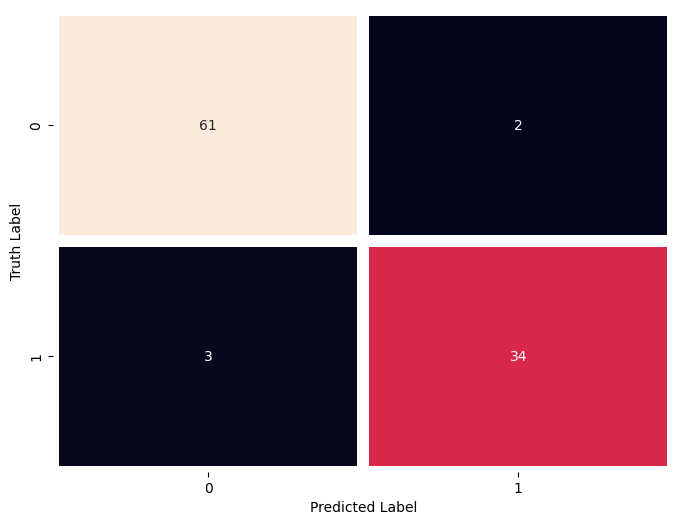

In [41]:
import seaborn as sns
c_m = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(c_m, annot=True, linewidths=8.5 , fmt= '', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [42]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model ,X_test, y_test);

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (c:\Users\Vinay\Documents\Physician.Ai\venv\Lib\site-packages\sklearn\metrics\__init__.py)

In [43]:
import joblib
joblib.dump(model, 'kidney_model.pkl')

['kidney_model.pkl']